/var/folders/3f/ltvwyfm53nb435_nt2n_7b9h0000gn/T/ipykernel_75454/367806082.py:10: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('Paired')


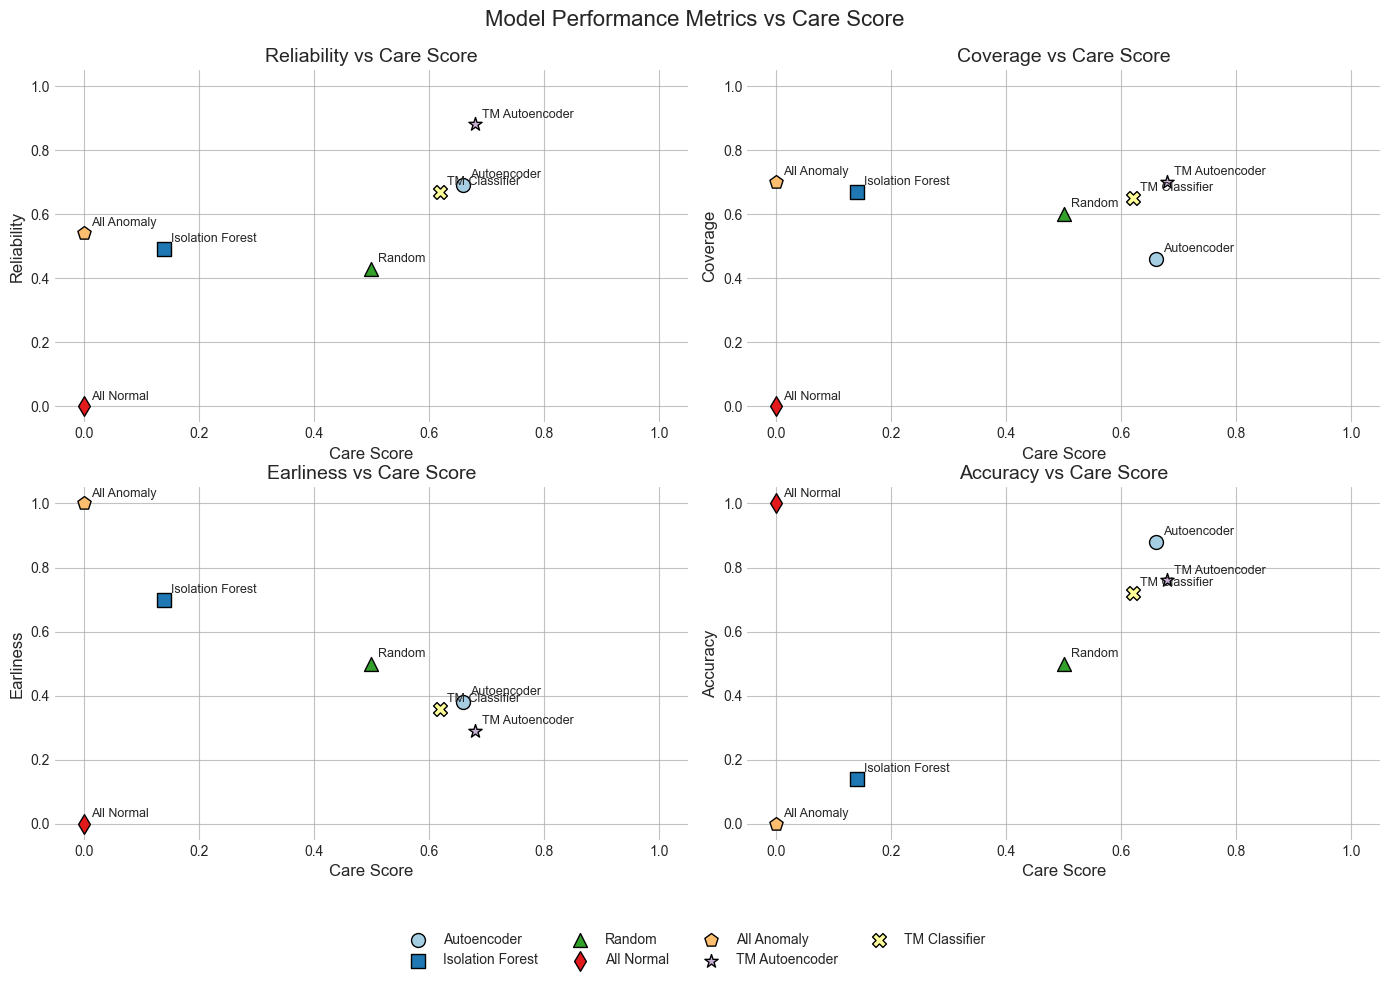

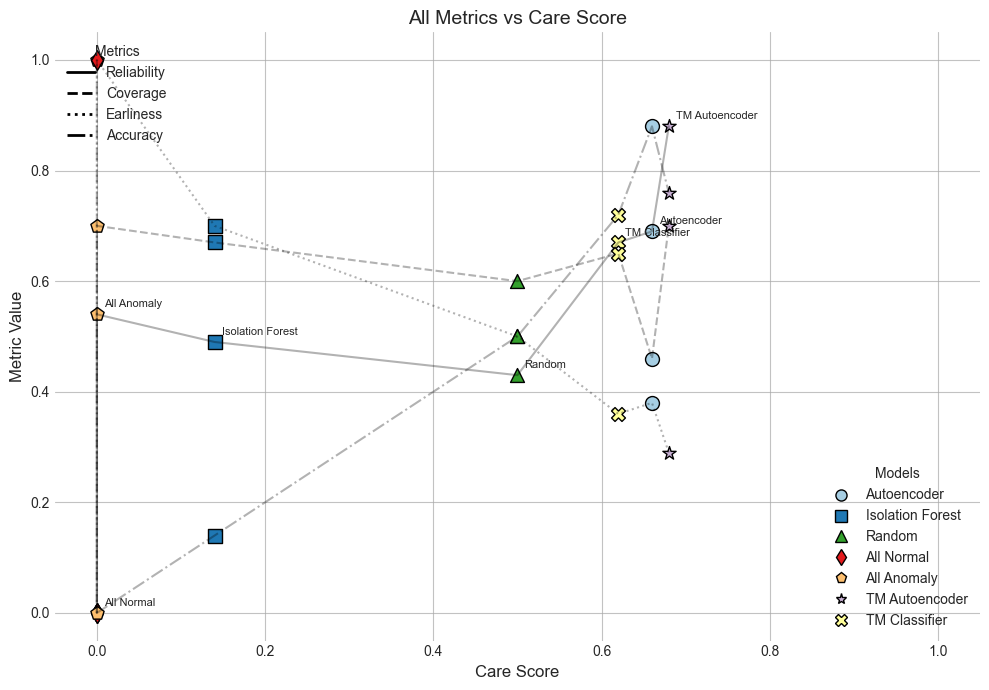


Correlation with Care Score:
Reliability: 0.7286
Coverage: 0.3644
Earliness: -0.3024
Accuracy: 0.4633


In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.cm as cm

# Read the CSV data from results.csv
df = pd.read_csv("results.csv")

# Get Paired colormap for the models
cmap = cm.get_cmap('Paired')
# Create a color for each unique model
model_colors = {model: cmap(i / len(df['model'].unique()))
                for i, model in enumerate(df['model'].unique())}

# Define different marker shapes for each model
markers = ['o', 's', '^', 'd', 'p', '*', 'X', 'P']  # circle, square, triangle, diamond, pentagon, star, x, plus
model_markers = {model: markers[i % len(markers)]
                 for i, model in enumerate(df['model'].unique())}

# Create a figure with white background and subplots
fig, axs = plt.subplots(2, 2, figsize=(14, 10), facecolor='white')
axs = axs.flatten()  # Flatten the 2x2 array for easier indexing

# Set overall figure background to white
fig.patch.set_facecolor('white')

# List of metrics to plot against care_score
metrics = ['reliability', 'coverage', 'earliness', 'accuracy']

# Plot each metric against care_score
for i, metric in enumerate(metrics):
    # Create scatter plot with model-specific colors and shapes
    for j, model in enumerate(df['model']):
        axs[i].scatter(df.loc[j, 'care_score'], df.loc[j, metric],
                       s=100, alpha=1.0, color=model_colors[model],
                       marker=model_markers[model], edgecolors='black',
                       label=model if i == 0 else "")  # Only add label in first plot

    # Add labels for each model
    for j, model in enumerate(df['model']):
        axs[i].annotate(model,
                        (df['care_score'].iloc[j], df[metric].iloc[j]),
                        xytext=(5, 5), textcoords='offset points',
                        fontsize=9)

    # Set labels and title
    axs[i].set_xlabel('Care Score', fontsize=12)
    axs[i].set_ylabel(metric.capitalize(), fontsize=12)
    axs[i].set_title(f'{metric.capitalize()} vs Care Score', fontsize=14)

    # Set axis limits from 0 to 1 (assuming scores are between 0 and 1)
    axs[i].set_xlim(-0.05, 1.05)
    axs[i].set_ylim(-0.05, 1.05)

    # Set white background for subplot
    axs[i].set_facecolor('white')

    # Add very prominent grid with dark gray color
    axs[i].grid(True, linestyle='-', linewidth=0.8, color='darkgray', alpha=0.7)

    # Make sure grid is behind the points
    axs[i].set_axisbelow(True)

# Add legend to the figure (only on the first subplot to avoid duplication)
handles, labels = axs[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='lower center', ncol=4, bbox_to_anchor=(0.5, 0.01))

# Adjust layout and add overall title
plt.tight_layout()
fig.suptitle('Model Performance Metrics vs Care Score', fontsize=16)
plt.subplots_adjust(top=0.92, bottom=0.15)  # Make room for the legend at the bottom

# Save the figure as PDF
plt.savefig('model_metrics_vs_care_score.pdf', format='pdf', bbox_inches='tight')

# Create a single plot with all metrics on one graph
plt.figure(figsize=(10, 7), facecolor='white')  # Made taller for more legend space

# For each metric, plot all models
for i, metric in enumerate(metrics):
    # Create a custom line style for each metric (for the legend)
    linestyles = ['-', '--', ':', '-.']  # solid, dashed, dotted, dash-dot

    for j, model in enumerate(df['model']):
        plt.scatter(df.loc[j, 'care_score'], df.loc[j, metric],
                    s=100, alpha=1.0, color=model_colors[model],
                    marker=model_markers[model], edgecolors='black')

# Create custom legend handles for metrics and models
from matplotlib.lines import Line2D

# Create legend for metrics
metric_handles = []
for i, metric in enumerate(metrics):
    metric_handles.append(Line2D([0], [0], color='black', lw=2,
                                 linestyle=linestyles[i], marker='',
                                 label=metric.capitalize()))

# Create legend for models
model_handles = []
for model in df['model'].unique():
    model_handles.append(Line2D([0], [0], color=model_colors[model], lw=0,
                                marker=model_markers[model], markersize=8,
                                markeredgecolor='black', label=model))

# Add metric-specific lines connecting points
for i, metric in enumerate(metrics):
    # Sort the dataframe by care_score for proper line connection
    df_sorted = df.sort_values(by='care_score')
    # Plot the line for this metric
    plt.plot(df_sorted['care_score'], df_sorted[metric],
             color='black', alpha=0.3, linestyle=linestyles[i])

# Add model names to the points for extra clarity
for j, model in enumerate(df['model']):
    plt.annotate(model,
                 (df['care_score'].iloc[j], df['reliability'].iloc[j]),
                 xytext=(5, 5), textcoords='offset points',
                 fontsize=8)

plt.xlabel('Care Score', fontsize=12)
plt.ylabel('Metric Value', fontsize=12)
plt.title('All Metrics vs Care Score', fontsize=14)
plt.xlim(-0.05, 1.05)
plt.ylim(-0.05, 1.05)

# Add both legends by obtaining the current axis
ax = plt.gca()
first_legend = ax.legend(handles=metric_handles, loc='upper left', title='Metrics')
ax.add_artist(first_legend)  # Add the first legend
ax.legend(handles=model_handles, loc='lower right', title='Models')  # Add the second legend

# Add very prominent grid with dark gray color
plt.grid(True, linestyle='-', linewidth=0.8, color='darkgray', alpha=0.7)
# Make sure grid is behind the points
ax.set_axisbelow(True)

plt.tight_layout()
plt.gca().set_facecolor('white')

# Save the figure as PDF
plt.savefig('all_metrics_vs_care_score.pdf', format='pdf', bbox_inches='tight')

plt.show()

# Print correlation of each metric with care_score
print("\nCorrelation with Care Score:")
for metric in metrics:
    correlation = df[metric].corr(df['care_score'])
    print(f"{metric.capitalize()}: {correlation:.4f}")

/var/folders/3f/ltvwyfm53nb435_nt2n_7b9h0000gn/T/ipykernel_75184/225604226.py:10: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('Paired')
/var/folders/3f/ltvwyfm53nb435_nt2n_7b9h0000gn/T/ipykernel_75184/225604226.py:262: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o-" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(angles, model_data, 'o-', linewidth=2,
/var/folders/3f/ltvwyfm53nb435_nt2n_7b9h0000gn/T/ipykernel_75184/225604226.py:262: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o-" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(angles, model_data, 'o-', linewidth=2,
/var/folders/3f/ltvwyfm53nb435_nt2n_7b9h0000gn/T/ipykernel_75184/225604226.py:262

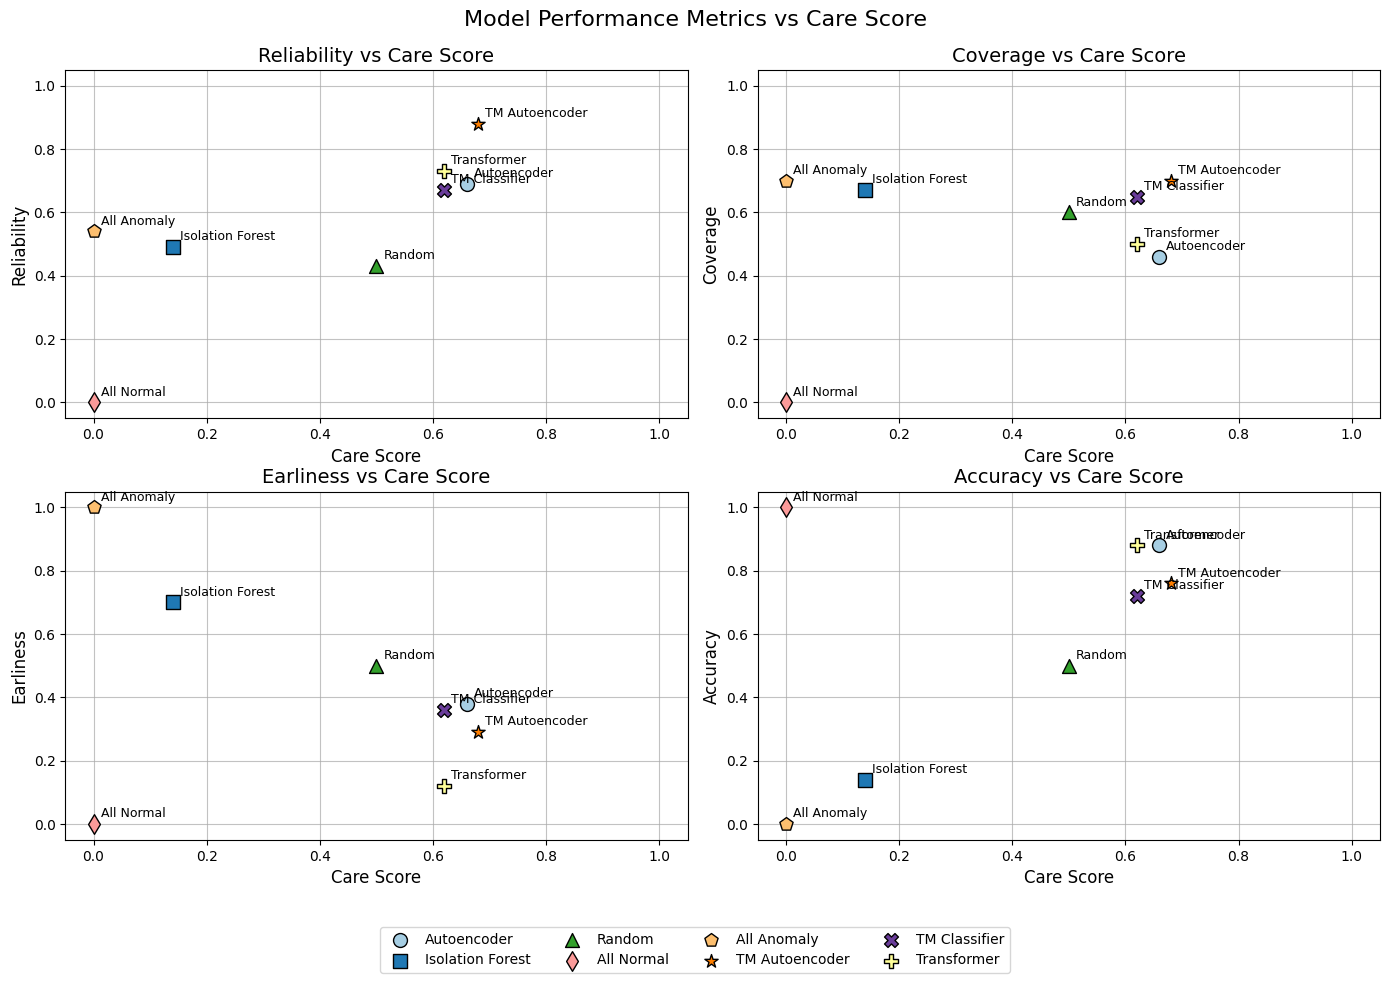

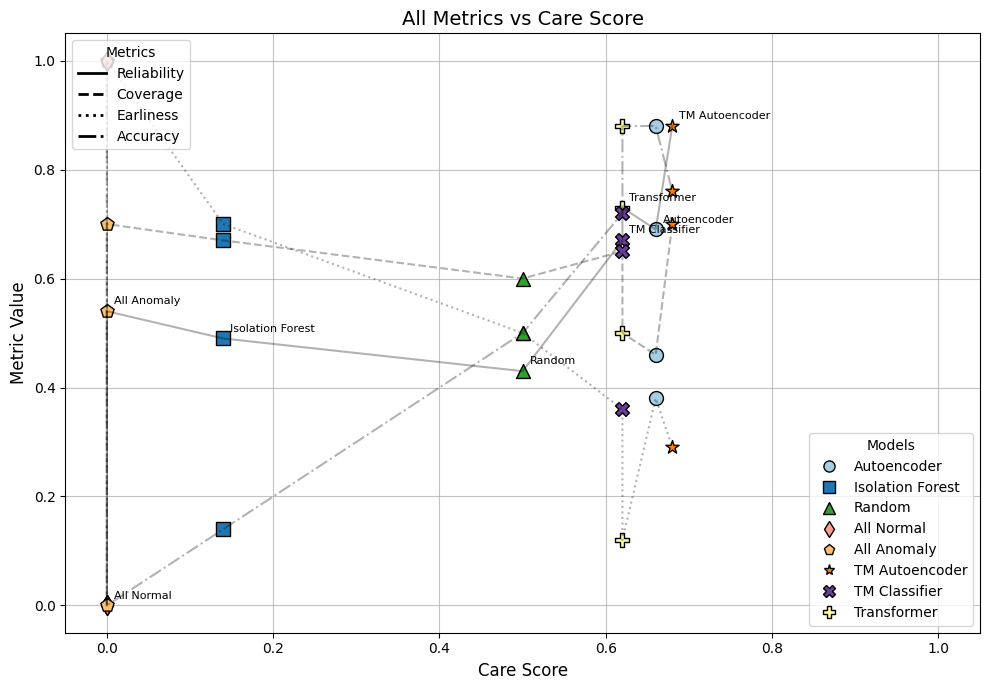

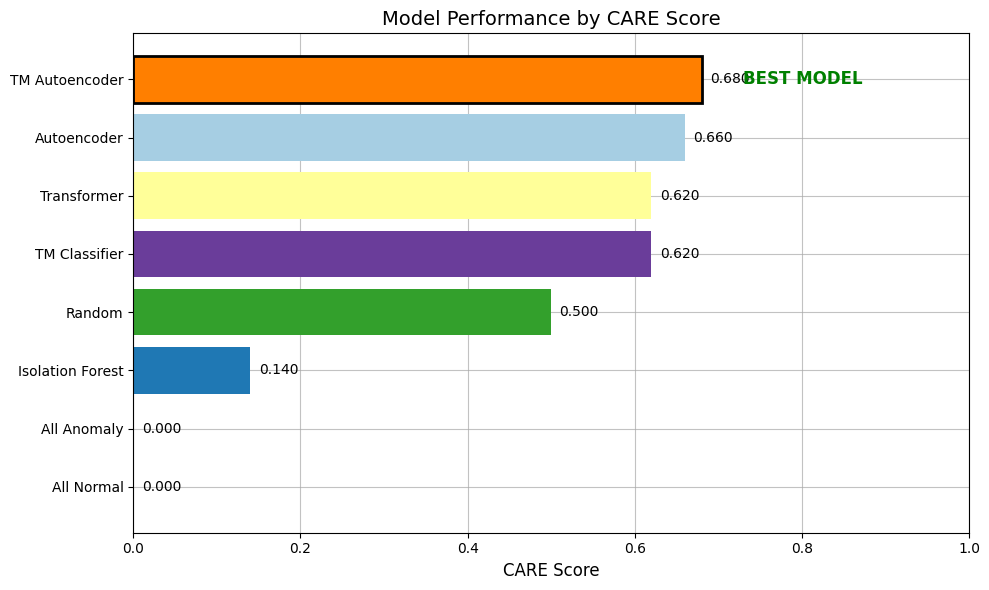

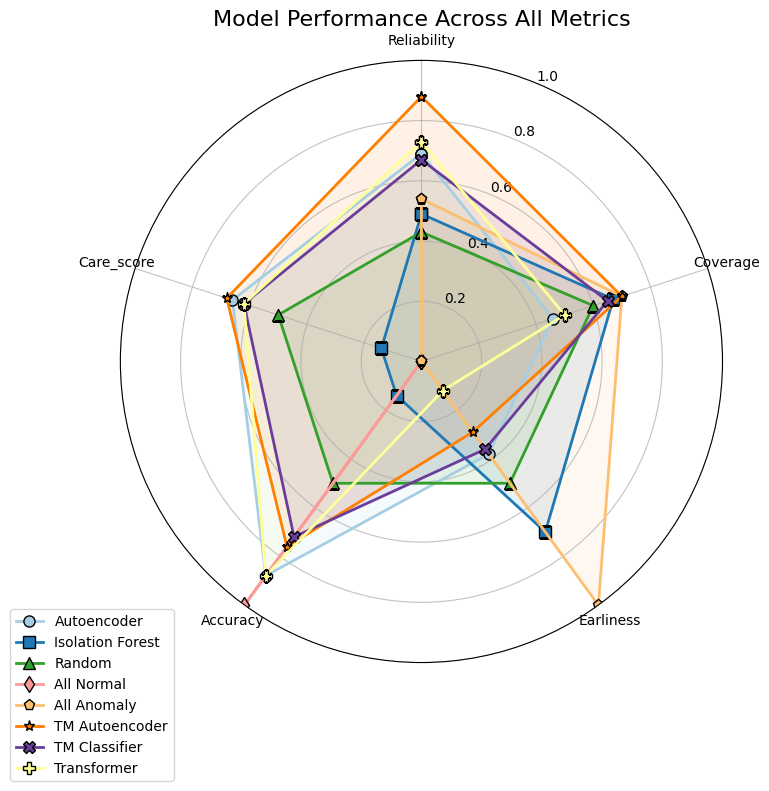


Correlation with Care Score:
Reliability: 0.7495
Coverage: 0.3305
Earliness: -0.3779
Accuracy: 0.5098

Best Model by CARE Score: TM Autoencoder (Score: 0.680)

Model Rankings by CARE Score:
1. TM Autoencoder (CARE Score: 0.680)
2. Autoencoder (CARE Score: 0.660)
3. TM Classifier (CARE Score: 0.620)
4. Transformer (CARE Score: 0.620)
5. Random (CARE Score: 0.500)
6. Isolation Forest (CARE Score: 0.140)
7. All Normal (CARE Score: 0.000)
8. All Anomaly (CARE Score: 0.000)


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.cm as cm

# Read the CSV data from results.csv
df = pd.read_csv("results.csv")

# Get Paired colormap for the models
cmap = cm.get_cmap('Paired')
# Create a color for each unique model
model_colors = {model: cmap(i / len(df['model'].unique()))
                for i, model in enumerate(df['model'].unique())}

# Define different marker shapes for each model
markers = ['o', 's', '^', 'd', 'p', '*', 'X', 'P']  # circle, square, triangle, diamond, pentagon, star, x, plus
model_markers = {model: markers[i % len(markers)]
                 for i, model in enumerate(df['model'].unique())}

# Create a figure with white background and subplots
fig, axs = plt.subplots(2, 2, figsize=(14, 10), facecolor='white')
axs = axs.flatten()  # Flatten the 2x2 array for easier indexing

# Set overall figure background to white
fig.patch.set_facecolor('white')

# List of metrics to plot against care_score
metrics = ['reliability', 'coverage', 'earliness', 'accuracy']

# Plot each metric against care_score
for i, metric in enumerate(metrics):
    # Create scatter plot with model-specific colors and shapes
    for j, model in enumerate(df['model']):
        axs[i].scatter(df.loc[j, 'care_score'], df.loc[j, metric],
                       s=100, alpha=1.0, color=model_colors[model],
                       marker=model_markers[model], edgecolors='black',
                       label=model if i == 0 else "")  # Only add label in first plot

    # Add labels for each model
    for j, model in enumerate(df['model']):
        axs[i].annotate(model,
                        (df['care_score'].iloc[j], df[metric].iloc[j]),
                        xytext=(5, 5), textcoords='offset points',
                        fontsize=9)

    # Set labels and title
    axs[i].set_xlabel('Care Score', fontsize=12)
    axs[i].set_ylabel(metric.capitalize(), fontsize=12)
    axs[i].set_title(f'{metric.capitalize()} vs Care Score', fontsize=14)

    # Set axis limits from 0 to 1 (assuming scores are between 0 and 1)
    axs[i].set_xlim(-0.05, 1.05)
    axs[i].set_ylim(-0.05, 1.05)

    # Set white background for subplot
    axs[i].set_facecolor('white')

    # Add very prominent grid with dark gray color
    axs[i].grid(True, linestyle='-', linewidth=0.8, color='darkgray', alpha=0.7)

    # Make sure grid is behind the points
    axs[i].set_axisbelow(True)

# Add legend to the figure (only on the first subplot to avoid duplication)
handles, labels = axs[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='lower center', ncol=4, bbox_to_anchor=(0.5, 0.01))

# Adjust layout and add overall title
plt.tight_layout()
fig.suptitle('Model Performance Metrics vs Care Score', fontsize=16)
plt.subplots_adjust(top=0.92, bottom=0.15)  # Make room for the legend at the bottom

# Save the figure as PDF
plt.savefig('model_metrics_vs_care_score.pdf', format='pdf', bbox_inches='tight')

# Create a single plot with all metrics on one graph
plt.figure(figsize=(10, 7), facecolor='white')  # Made taller for more legend space

# For each metric, plot all models
for i, metric in enumerate(metrics):
    # Create a custom line style for each metric (for the legend)
    linestyles = ['-', '--', ':', '-.']  # solid, dashed, dotted, dash-dot

    for j, model in enumerate(df['model']):
        plt.scatter(df.loc[j, 'care_score'], df.loc[j, metric],
                    s=100, alpha=1.0, color=model_colors[model],
                    marker=model_markers[model], edgecolors='black')

# Create custom legend handles for metrics and models
from matplotlib.lines import Line2D

# Create legend for metrics
metric_handles = []
for i, metric in enumerate(metrics):
    metric_handles.append(Line2D([0], [0], color='black', lw=2,
                                 linestyle=linestyles[i], marker='',
                                 label=metric.capitalize()))

# Create legend for models
model_handles = []
for model in df['model'].unique():
    model_handles.append(Line2D([0], [0], color=model_colors[model], lw=0,
                                marker=model_markers[model], markersize=8,
                                markeredgecolor='black', label=model))

# Add metric-specific lines connecting points
for i, metric in enumerate(metrics):
    # Sort the dataframe by care_score for proper line connection
    df_sorted = df.sort_values(by='care_score')
    # Plot the line for this metric
    plt.plot(df_sorted['care_score'], df_sorted[metric],
             color='black', alpha=0.3, linestyle=linestyles[i])

# Add model names to the points for extra clarity
for j, model in enumerate(df['model']):
    plt.annotate(model,
                 (df['care_score'].iloc[j], df['reliability'].iloc[j]),
                 xytext=(5, 5), textcoords='offset points',
                 fontsize=8)

plt.xlabel('Care Score', fontsize=12)
plt.ylabel('Metric Value', fontsize=12)
plt.title('All Metrics vs Care Score', fontsize=14)
plt.xlim(-0.05, 1.05)
plt.ylim(-0.05, 1.05)

# Add both legends by obtaining the current axis
ax = plt.gca()
first_legend = ax.legend(handles=metric_handles, loc='upper left', title='Metrics')
ax.add_artist(first_legend)  # Add the first legend
ax.legend(handles=model_handles, loc='lower right', title='Models')  # Add the second legend

# Add very prominent grid with dark gray color
plt.grid(True, linestyle='-', linewidth=0.8, color='darkgray', alpha=0.7)
# Make sure grid is behind the points
ax.set_axisbelow(True)

plt.tight_layout()
plt.gca().set_facecolor('white')

# Save the figure as PDF
plt.savefig('all_metrics_vs_care_score.pdf', format='pdf', bbox_inches='tight')

# Create a horizontal bar chart using CARE score directly
# Sort by care_score for the plot
df_sorted = df.sort_values('care_score', ascending=True)

# Create a figure for the CARE score comparison
plt.figure(figsize=(10, 6), facecolor='white')

# Create horizontal bar chart
bars = plt.barh(df_sorted['model'], df_sorted['care_score'],
                color=[model_colors[model] for model in df_sorted['model']])

# Add precise score values at the end of each bar
for i, bar in enumerate(bars):
    plt.text(bar.get_width() + 0.01, bar.get_y() + bar.get_height() / 2,
             f'{df_sorted["care_score"].iloc[i]:.3f}',
             va='center', fontsize=10)

# Highlight the best model (highest CARE score)
best_model_idx = df_sorted['care_score'].idxmax()
best_model = df_sorted.loc[best_model_idx, 'model']
best_score = df_sorted.loc[best_model_idx, 'care_score']

# Find the bar representing the best model and add a black edge
bars[-1].set_edgecolor('black')
bars[-1].set_linewidth(2)

# Add a text annotation highlighting this is the best model
plt.text(best_score + 0.05, df_sorted['model'].iloc[-1],
         'BEST MODEL', fontsize=12, fontweight='bold',
         va='center', color='green')

plt.title('Model Performance by CARE Score', fontsize=14)
plt.xlabel('CARE Score', fontsize=12)
plt.xlim(0, 1.0)  # Set x-axis from 0 to 1
plt.grid(True, linestyle='-', linewidth=0.8, color='darkgray', alpha=0.7)
plt.gca().set_axisbelow(True)
plt.tight_layout()

# Save the figure as PDF
plt.savefig('model_care_score_ranking.pdf', format='pdf', bbox_inches='tight')

# Create a radar chart (spider chart) to visualize all metrics for each model
from matplotlib.path import Path
from matplotlib.spines import Spine
from matplotlib.transforms import Affine2D
from matplotlib.projections import register_projection


def radar_factory(num_vars, frame='circle'):
    """Create a radar chart with `num_vars` axes."""
    # Calculate evenly-spaced axis angles
    theta = np.linspace(0, 2 * np.pi, num_vars, endpoint=False)

    class RadarAxes(plt.PolarAxes):
        name = 'radar'

        def __init__(self, *args, **kwargs):
            super().__init__(*args, **kwargs)
            self.set_theta_zero_location('N')

        def fill(self, *args, closed=True, **kwargs):
            """Override fill so that line is closed by default"""
            return super().fill(closed=closed, *args, **kwargs)

        def plot(self, *args, **kwargs):
            """Override plot so that line is closed by default"""
            lines = super().plot(*args, **kwargs)
            for line in lines:
                self._close_line(line)

        def _close_line(self, line):
            x, y = line.get_data()
            # FIXME: markers at x[0], y[0] get doubled-up
            if x[0] != x[-1]:
                x = np.concatenate((x, [x[0]]))
                y = np.concatenate((y, [y[0]]))
                line.set_data(x, y)

        def set_varlabels(self, labels):
            self.set_thetagrids(np.degrees(theta), labels)

        def _gen_axes_patch(self):
            return plt.Circle((0.5, 0.5), 0.5)

    register_projection(RadarAxes)
    return theta


# Create radar chart
all_metrics = metrics + ['care_score']
num_metrics = len(all_metrics)
theta = radar_factory(num_metrics)

# Set up figure for radar chart
fig = plt.figure(figsize=(10, 8), facecolor='white')
ax = fig.add_subplot(111, projection='polar')
ax.set_theta_zero_location('N')
ax.set_theta_direction(-1)  # Clockwise

# Set radial axis limits
ax.set_ylim(0, 1)

# Draw one axis per variable + add labels
angles = np.linspace(0, 2 * np.pi, num_metrics, endpoint=False).tolist()
angles += angles[:1]  # Close the loop

# Draw labels for each metric
ax.set_xticks(angles[:-1])
ax.set_xticklabels([metric.capitalize() for metric in all_metrics])

# Draw radial grid lines
ax.grid(True, linestyle='-', linewidth=0.8, color='darkgray', alpha=0.7)

# Plot each model as a polygon
for i, model in enumerate(df['model']):
    model_data = df.loc[df['model'] == model, all_metrics].values.flatten().tolist()
    model_data += model_data[:1]  # Close the loop

    ax.plot(angles, model_data, 'o-', linewidth=2,
            color=model_colors[model], markersize=8,
            marker=model_markers[model], markeredgecolor='black',
            label=model)

# Fill each polygon with semi-transparent color
for i, model in enumerate(df['model']):
    model_data = df.loc[df['model'] == model, all_metrics].values.flatten().tolist()
    model_data += model_data[:1]  # Close the loop

    ax.fill(angles, model_data, color=model_colors[model], alpha=0.1)

# Add legend
plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))

plt.title('Model Performance Across All Metrics', fontsize=16)
plt.tight_layout()

# Save radar chart as PDF
plt.savefig('model_radar_chart.pdf', format='pdf', bbox_inches='tight')

plt.show()

# Print correlation of each metric with care_score
print("\nCorrelation with Care Score:")
for metric in metrics:
    correlation = df[metric].corr(df['care_score'])
    print(f"{metric.capitalize()}: {correlation:.4f}")

# Print best model by CARE score
best_model = df.loc[df['care_score'].idxmax(), 'model']
best_score = df.loc[df['care_score'].idxmax(), 'care_score']
print(f"\nBest Model by CARE Score: {best_model} (Score: {best_score:.3f})")

# Print each model's ranking by CARE score
print("\nModel Rankings by CARE Score:")
for i, (idx, row) in enumerate(df.sort_values('care_score', ascending=False).iterrows(), 1):
    print(f"{i}. {row['model']} (CARE Score: {row['care_score']:.3f})")